In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
import warnings
import video as v
import display as d
import graph as g
import cv2 as cv
from video import FRAME_X,FRAME_Y


In [2]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [3]:
reload(v)
df = v.get_vid_df('videos/Color Flash.mp4')


In [4]:
df.attrs['width']


100

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1500000 entries, (0, 0, 0) to (149, 99, 99)
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype
---  ------      --------------    -----
 0   hue         1500000 non-null  uint8
 1   lightness   1500000 non-null  uint8
 2   saturation  1500000 non-null  uint8
dtypes: uint8(3)
memory usage: 10.0 MB


## Test graph function

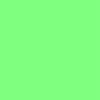

In [6]:

d.show_sequence(df[df.index.get_level_values(0) == 1],8)

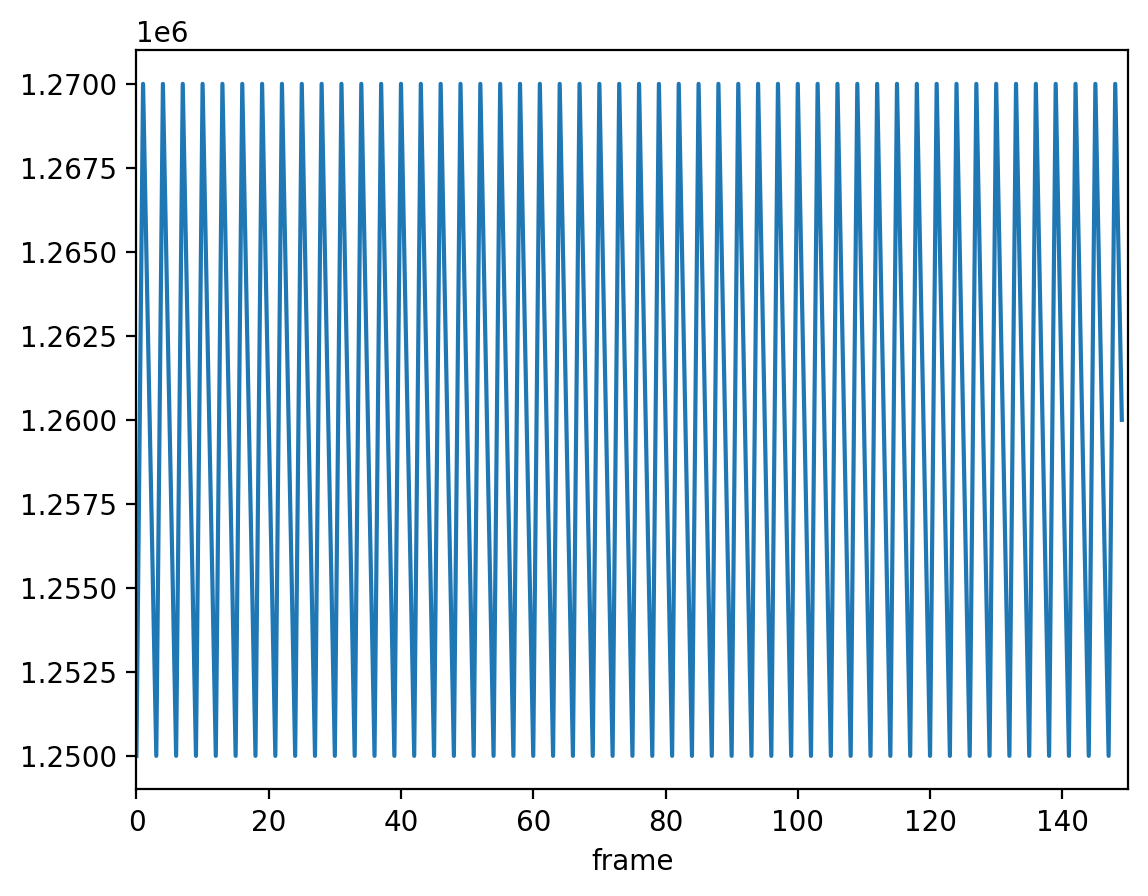

In [7]:
reload(g)
g.graph_frames(df, 'lightness', lambda gb, key: gb[key].sum(),by_seconds=False)
plt.show()


In [8]:
# from scipy.signal import periodogram

# f, spectral_density = periodogram(df.lightness,5)
# plt.figure()
# plt.symylog(f,spectral_density)

# plt.show()

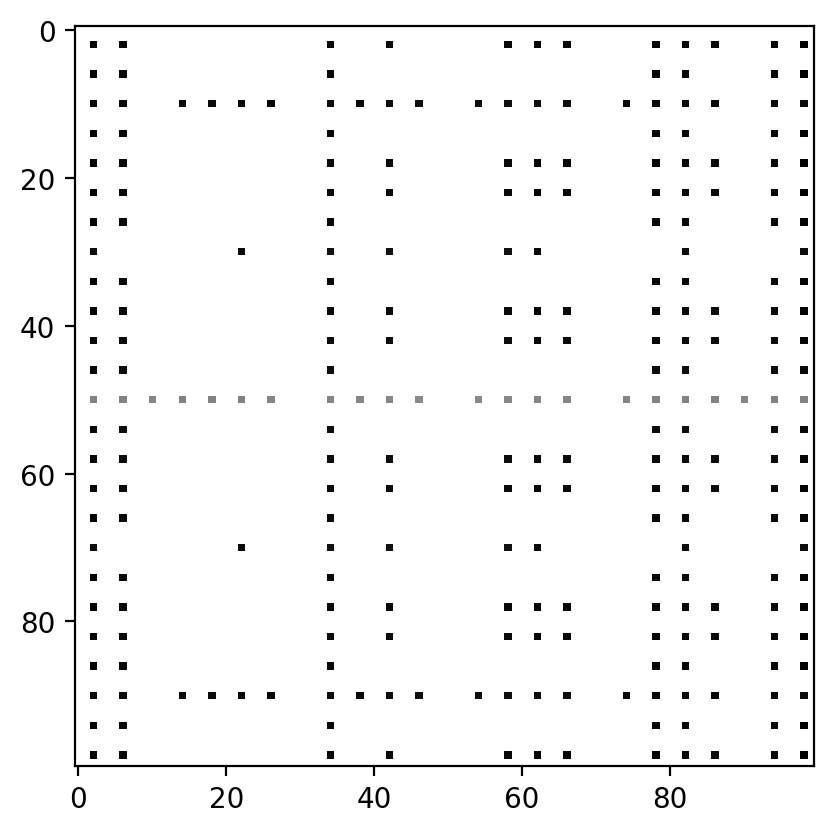

(100, 100)

In [18]:
img = df[df.index.get_level_values(0) == 1].lightness.to_numpy().reshape((-1,100))
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()
img.shape